<a href="https://colab.research.google.com/github/Art9050/learning/blob/main/%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Конспект лекции

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [20]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [21]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,OnlineSecurity_flg,OnlineBackup_flg,DeviceProtection_flg,TechSupport_flg,StreamingTV_flg,StreamingMovies_flg,Churn_flg,N_services
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,No,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1889.50,No,1.0,0.0,1.0,0.0,0.0,0.0,0,2.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,108.15,Yes,1.0,1.0,0.0,0.0,0.0,0.0,1,2.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1840.75,No,1.0,0.0,1.0,1.0,0.0,0.0,0,3.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,151.65,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0


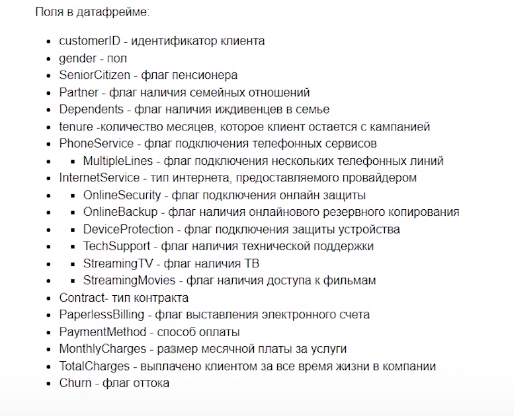

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Нужно заменить значение оттока на числовое

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

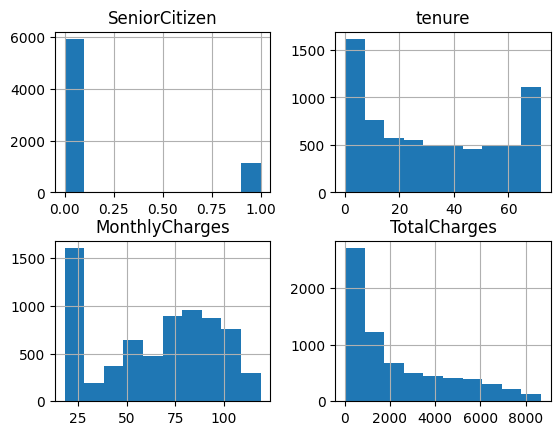

In [24]:
df.hist()

In [25]:
# Распределение признака по частоте
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<Axes: xlabel='count', ylabel='PaymentMethod'>

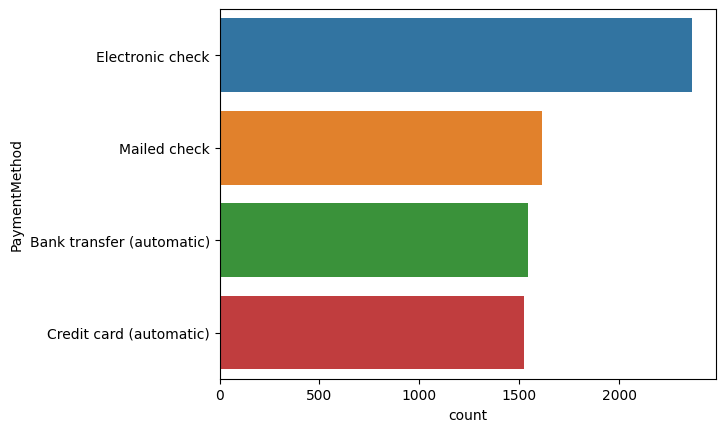

In [26]:
# Визаулизация распределение признака по частоте
sns.countplot(y=df['PaymentMethod'])

In [27]:
# Возвращаем индекс для каждой строки по условия топ(3)
df['PaymentMethod'].value_counts().head(3).index

Index(['Electronic check', 'Mailed check', 'Bank transfer (automatic)'], dtype='object')

<Axes: xlabel='PaymentMethod', ylabel='count'>

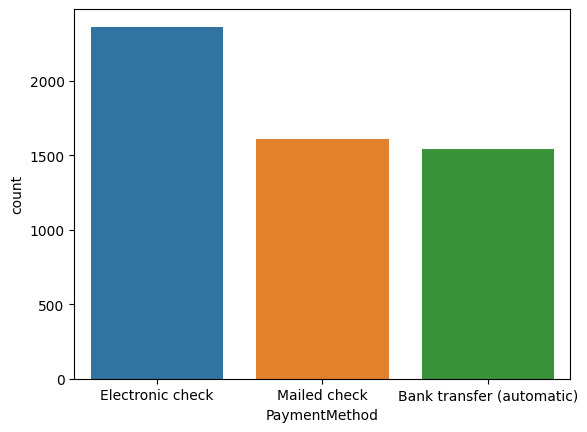

In [28]:
# Визаулизация распределение признака по частоте по условию наличия индекса в топ(3)
sns.countplot(x=df[df['PaymentMethod'].isin(df['PaymentMethod'].value_counts().head(3).index)]['PaymentMethod'])

In [29]:
# Выплаты клиента в звисимости от времени жизни с компанией

In [30]:
# Сколько в среднем заплатит один клиент в зависимости от кол-ва месяцев ('tenure'), перезаписываем индексы
df1=df.groupby('tenure').agg({'TotalCharges':'mean'}).reset_index()

In [31]:
df1.head()

,tenure,TotalCharges
0,0,NaN
1,1,50.485808
2,2,114.332353
3,3,174.690000
4,4,230.530682


In [39]:
line = go.Scatter(x=df1['tenure'], y=df1['TotalCharges'], mode='lines')
fig = go.Figure(data=line)

fig.update_layout(
    autosize=False,
    width=700,
    height=400,
    title= "Зависимсть средних выплат клиента от времени жизни с компанией",
    xaxis_title="месяцев с подкл.усл.",
    yaxis_title="ср.выплаты клиента"
)
fig.show()

Text(0, 0.5, 'Срок жини клиента в компании. мес.')

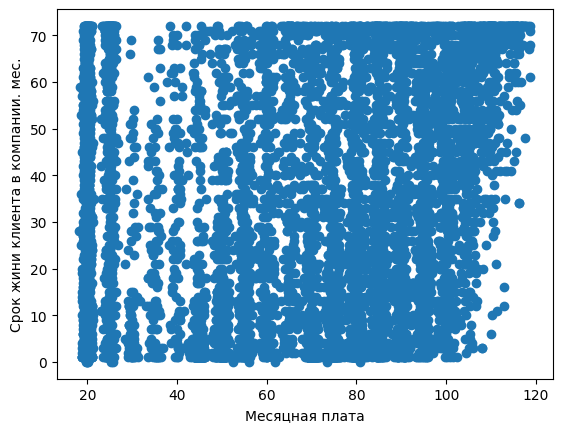

In [40]:
plt.scatter(df['MonthlyCharges'], df['tenure'])
plt.xlabel('Месяцная плата')
plt.ylabel('Срок жини клиента в компании. мес.')

In [41]:
# Раскрасим точки по факту оттока
df['Churn'].map({'No':'blue','Yes':'orange'}).head()

0      blue
1      blue
2    orange
3      blue
4    orange
Name: Churn, dtype: object

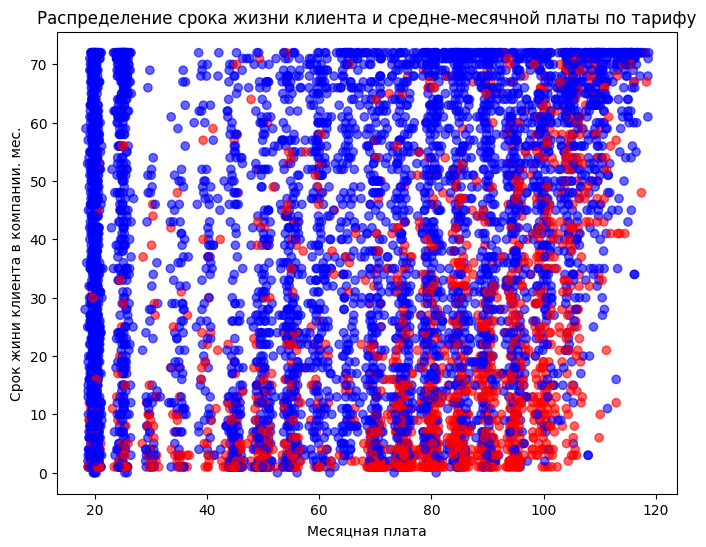

In [42]:
plt.figure(figsize=(8,6)) #Размер
plt.scatter(df['MonthlyCharges'], df['tenure'],
            color=df['Churn'].map({'No':'blue','Yes':'red'}),
            alpha=0.6) #прозрачность
plt.title('Распределение срока жизни клиента и средне-месячной платы по тарифу')
plt.xlabel('Месяцная плата')
plt.ylabel('Срок жини клиента в компании. мес.')
plt.show()

Гипотеза: Много платит и мало находится в компании - высока вероятность ухода

In [43]:
# фильтр по ушедшим клиентам
df[df['Churn'] == 'Yes'].head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


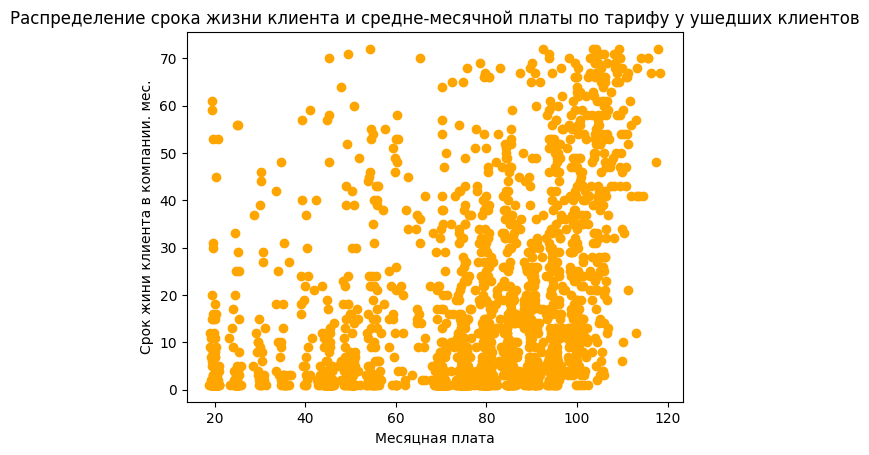

In [44]:
l1 = plt.scatter(df[df['Churn'] == 'Yes']['MonthlyCharges'],df[df['Churn'] == 'Yes']['tenure'],
            color='orange');
plt.title('Распределение срока жизни клиента и средне-месячной платы по тарифу у ушедших клиентов')
plt.xlabel('Месяцная плата')
plt.ylabel('Срок жини клиента в компании. мес.')
plt.show()

## Задание 1

Давайте продолжим искать переменные, которые разделяют факт ухода клиента. Посмотрим, влияет ли флаг пенсионера на вероятность оттока. Постройте диаграмму, которая могла бы ответить на этот вопрос.

In [45]:
# фильтр по пенсионерам
df[df['SeniorCitizen'] == 1].head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No


In [46]:
# фильтр по ушедшим клиентам
df[df['Churn'] == 'Yes'].head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
# Отключивщиеся пенсионеры
df['SeniorCitizen'][(df['SeniorCitizen'] == 1)&(df['Churn'] == 'Yes')].value_counts()

1    476
Name: SeniorCitizen, dtype: int64

In [48]:
# Отключивщиеся НЕ пенсионеры
df['SeniorCitizen'][(df['SeniorCitizen'] == 0)&(df['Churn'] == 'Yes')].value_counts()

0    1393
Name: SeniorCitizen, dtype: int64

In [51]:
# Группировка по флагу пенсионера и флагу отключения, подсчет уникальных значений id
df_1=df.groupby(['SeniorCitizen','Churn']).agg({'customerID':'nunique'}).reset_index()

# Переименовываем колонки
df_1.columns = ['SeniorCitizen','Churn','count']
df_1

,SeniorCitizen,Churn,count
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


### Вопросы к тесту
*Какая доля НЕ пенсионеров отключают услуги? Ответ введите в процентах, округлив до целых (без знака %)*

- 476 / (476 + 666) * 100 = 41,68 = 42%

*Какая доля НЕ пенсионеров отключают услуги? Ответ введите в процентах, округлив до целых (без знака %)*

- 1393 / (4508 + 1393) * 100 =23,60 = 24%

<Axes: xlabel='SeniorCitizen', ylabel='count'>

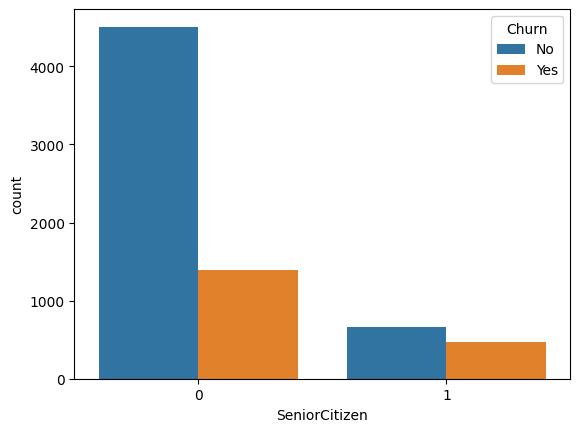

In [52]:
sns.barplot(data=df_1, x="SeniorCitizen", y="count" ,hue="Churn")

In [55]:
fig = px.histogram(
    data_frame=df,
    x="SeniorCitizen",
    color="Churn",
    title="Кол-во <b>ушедших</b> и <b>неушедших</b> клиентов в зависимости от флага пенсионера",
    histnorm="density",
    width=800, height=400
)

fig.update_xaxes(categoryorder="total descending")

fig.show()

## Задание 2

Если у клиента подключен интернет, то ему доступны 6 дополнительных услуг, а именно: онлайн защита, онлайновое резервное копирование, защита устройства, наличие ТВ, наличие доступа к фильмам. Скорее всего, чтобы удержать клиента нам выгодно по-максимуму погружать его в нашу экосистему. Давайте посмотрим, зависит ли % оттекших клиентов от кол-ва услуг, которые у них были подключены (по клиентам, у кого подключен интернет) ? Одинаковая ли зависимость на разных типах интернета? Подберите тип визуализации и постройте график\диаграмму, который смог бы ответить на эти вопросы.

*Какая разница между оттоком клиентов при 4 подключенных услугах у Fiber optic и DSL? Ответ введите в процентах, округлив до целых (без знака %)*

In [56]:
# Присваиваем флагу числовое значение {'No': 0, 'Yes': 1}
df['OnlineSecurity_flg']=df['OnlineSecurity'].map({'No': 0, 'Yes': 1})
df['OnlineBackup_flg']=df['OnlineBackup'].map({'No': 0, 'Yes': 1})
df['DeviceProtection_flg']=df['DeviceProtection'].map({'No': 0, 'Yes': 1})
df['TechSupport_flg']=df['TechSupport'].map({'No': 0, 'Yes': 1})
df['StreamingTV_flg']=df['StreamingTV'].map({'No': 0, 'Yes': 1})
df['StreamingMovies_flg']=df['StreamingMovies'].map({'No': 0, 'Yes': 1})
df['Churn_flg']=df['Churn'].map({'No': 0, 'Yes': 1})

In [57]:
# считаем количество {'Yes': 1}
df['N_services'] = (df['OnlineSecurity_flg'] + df['OnlineBackup_flg']
+ df['DeviceProtection_flg'] + df['TechSupport_flg']
+ df['StreamingTV_flg'] + df['StreamingMovies_flg'])

In [70]:
# делаем таблицу, где каждому типу интернета на каждое кол-во подключенных доп. услуг будет соотв-ть % ушедших клиентов
# и заодно посмотрим, а какое кол-во наблюдений имеем в каждой группе, можно ли вообще эти цифры сравнивать
table = df.groupby(['InternetService','N_services']).agg({'customerID':'nunique','Churn_flg':'mean'}).reset_index()
table

,InternetService,N_services,customerID,Churn_flg
0,DSL,0.0,294,0.411565
1,DSL,1.0,415,0.322892
2,DSL,2.0,454,0.202643
3,DSL,3.0,475,0.130526
4,DSL,4.0,359,0.091922
5,DSL,5.0,281,0.053381
6,DSL,6.0,143,0.013986
7,Fiber optic,0.0,399,0.604010
8,Fiber optic,1.0,551,0.558984
9,Fiber optic,2.0,579,0.480138


In [68]:
# делаем таблицу1, где каждому типу интернета на каждое кол-во подключенных доп. услуг будет соотв-ть % ушедших клиентов
table1 = df.groupby(['InternetService','N_services','Churn_flg']).agg({'customerID':'nunique'}).reset_index()
table1.head()

,InternetService,N_services,Churn_flg,customerID
0,DSL,0.0,0,173
1,DSL,0.0,1,121
2,DSL,1.0,0,281
3,DSL,1.0,1,134
4,DSL,2.0,0,362


In [67]:
table1.loc[((table1['N_services'] >= 4) & (table1['Churn_flg'] == 1))]

,InternetService,N_services,Churn_flg,customerID
9,DSL,4.0,1,33
11,DSL,5.0,1,15
13,DSL,6.0,1,2
23,Fiber optic,4.0,1,157
25,Fiber optic,5.0,1,56
27,Fiber optic,6.0,1,13


In [71]:
# отток клиентов при 4 подключенных услугах у Fiber optic и DSL
table1.loc[((table1['N_services'] >= 4) & (table1['Churn_flg'] == 1))].groupby(['InternetService']).agg({'customerID':'sum'}).reset_index()

,InternetService,customerID
0,DSL,50
1,Fiber optic,226


In [77]:
# клиенты при 4 подключенных услугах у Fiber optic и DSL
table1.loc[(table1['N_services'] >= 4)].groupby(['InternetService']).agg({'customerID':'sum'}).reset_index()

,InternetService,customerID
0,DSL,783
1,Fiber optic,924


In [75]:
# Всего клиентов Fiber optic и DSL
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

### Вопросы к тесту
*Какая разница между оттоком клиентов при 4 подключенных услугах у Fiber optic и DSL? Ответ введите в процентах, округлив до целых (без знака %)*

- 23%

In [78]:
fig = go.Figure()

#  каждую из линий добавляем отдельно на график
fig.add_trace(go.Scatter(x=table.query('InternetService=="DSL"')['N_services'],
                         y=table.query('InternetService=="DSL"')['Churn_flg'],
                    mode='lines',
                    name='DSL'))

fig.add_trace(go.Scatter(x=table.query('InternetService=="Fiber optic"')['N_services'],
                         y=table.query('InternetService=="Fiber optic"')['Churn_flg'],
                    mode='lines',
                    name='Fiber optic'))
fig.update_layout(
    width=800, # задаем размер графика
    height=600,
    title='Зависимость % ушедших клиентов от кол-ва подключенных доп услуг',
    xaxis_title='число подкл услуг',
    yaxis_title='% ушедших клиентов'
)
fig.show()

# Дополнительный материал и ссылки

[Статья с анализом схожей тематики](https://habr.com/ru/companies/otus/articles/750822/)